**Universidade Federal do Rio Grande do Sul (UFRGS)    
Programa de Pós-Graduação em Engenharia Civil (PPGEC) - Estruturas**

# PEC00025: Introdução à Teoria de Vibrações

### Trabalho 1 - Resposta de um sistema com 1 Grau de Liberdade à uma excitação na base: espectro de pseudo aceleração


**Aluna:** Marcela Sousa Mossmann                                           

**Cartão UFRGS:** 250197
                                                                         

In [45]:
# Módulos do Python que foram importados:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from MRPy import MRPy

In [46]:
m  = 1.0       # massa do sistema em kg
zt = 0.01      # razão de amortecimento crítica
Tn = np.linspace(0.01, 10, 1000)
fn = 1/Tn      # frequência natural in Hz
u0 = 0.        # deslocamento inicial
v0 = 0.        # velocidade inicial

## 1. Informações preliminares  <a name="section_21"></a>

   Este trabalho foi feito com base nas aulas ministradas sobre Teoria de Vibrações, bibliografia consultada acerca da dinâmica aplicada em estruturas de concreto, e análise espectral para movimento sísmico. Logo abaixo serão especificados o objeto de estudo, medições tomadas através de sensores, assim como as soluções encontradas para o cálculo do espectro de pseudo aceleração.
    

## 2. Introdução  <a name="section_21"></a>

A problemática proposta para este trabalho consiste no cálculo do espectro de pseudo aceleração em resposta à uma excitação de base em um sistema com 1 grau de liberdade. Foi selecionado o objeto que sofrerá a excitação, e tomadas medições das vibrações através dos sensores presentes em um celular. Para o cálculo de resposta foram utilizados os módulos importados no começo do trabalho, em código _Python_, assim como os códigos presentes nos repositórios do Prof. Marcelo M. Rocha, incluindo alguns de sua própria autoria.

## 3. Objeto de estudo e coleta de dados <a name="section_4"></a> 



O objeto selecionado para medição das vibrações foi a superfície de um carro, modelo Ford Corcel I (ano 1977), onde foi fixado o aparelho celular, e ativado o motor de partida, gerando a excitação inicial, e logo em seguida foi desligado. Os dados foram gravados através do aplicativo ```iNVH```, da Bosch, originando arquivos em formato _.csv_ com quatro colunas, apresentando informações como o tempo de amostra e aceleração nos três eixos de movimento, ($x$, $y$, $z$). Abaixo constam fotos do objeto de estudo e do método adotado para as medições.


In [32]:
%%html
<img src="img\file3.jpeg", width=400, height=400>

In [35]:
%%html
<img src="img\file5.jpeg", width=400, height=400>

Foram coletadas várias amostras e escolhida a de duração de 3 segundos, onde conseguimos perceber as vibrações nos três eixos de movimento ($x$, $y$, $z$), representados nos gráficos abaixo, respectivamente:

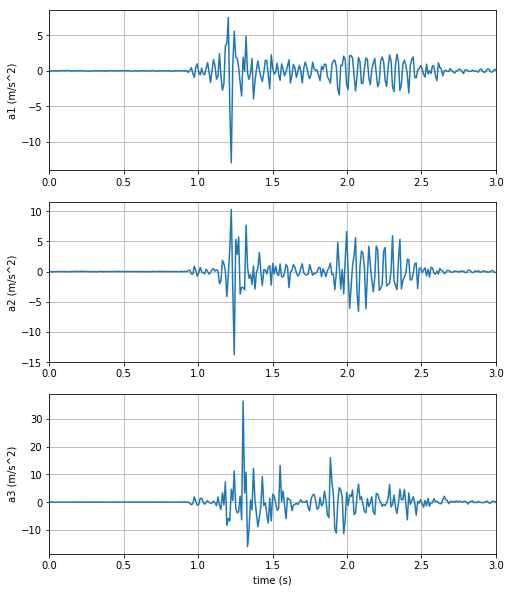

In [37]:
data = MRPy.from_file('corcel77', form='invh').zero_mean()
t    = data.t_axis()

plt.figure(6, figsize=(8, 10), clear=True)

for kX, acc in enumerate(data):
    
    plt.subplot(3, 1 ,kX+1)
    plt.plot(t, acc)

    plt.xlim(0,3);   
    plt.ylabel('a{0} (m/s^2)'.format(kX+1)) 

    plt.grid(True) 

plt.xlabel('time (s)');

Podemos perceber que a maior parte dos movimentos acontece no eixo $z$, por isso, este será selecionado e utilizado para a representação da aceleração proposta neste trabalho.


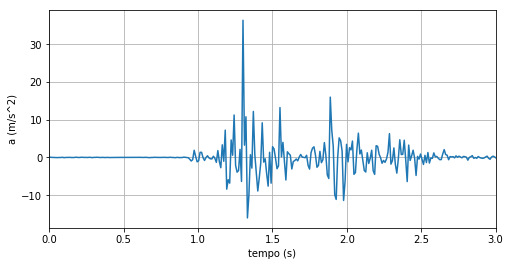

In [4]:
az = MRPy(data[2], data.fs)  
t  = az.t_axis()

plt.figure(7, figsize=(8, 4), clear=True)
plt.plot(t, az[0])

plt.xlim(0,3);  plt.xlabel('tempo (s)') 
plt.ylabel('a (m/s^2)') 

plt.grid(True) 


## 4. Espectro de pseudo aceleração  <a name="section_21"></a>

O significado do cálculo de um espectro de resposta à uma aceleração não é meramente uma representação direta da ação, mas sim, através dos registros coletados, uma representação dos seus efeitos sobre um sistema linear de um grau de liberdade. Neste trabalho, o cálculo do espectro de pseudo aceleração será feito através do método de análise dinâmica de estruturas lineares, representado pela integral de Duhamel, como foi utilizado a rotina computacional em _Python_, abaixo.

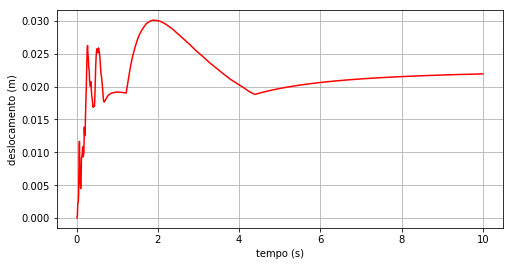

In [40]:
umax = np.empty(fn.shape)

for k, f in enumerate(fn):
    u = az.sdof_Duhamel(f, zt, u0, v0)/m
    umax[k]=u.max()
    
plt.figure(8, figsize=(8, 4), clear=True)
plt.plot(Tn, umax, 'r')

plt.xlabel('tempo (s)') 
plt.ylabel('deslocamento (m)') 

plt.grid(True) 


A partir da seleção de todos os deslocamentos máximos, é calculado o espectro de pseudo aceleração, a qual dependerá da frequência $w$ e da função $umax$:

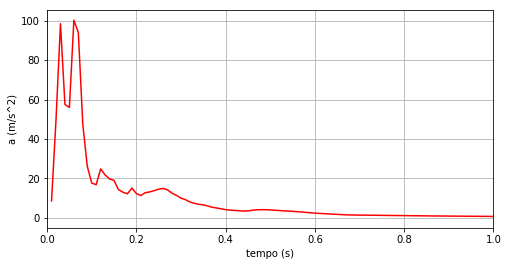

In [39]:
a2=((2*np.pi*fn)**2)*umax
plt.figure(7, figsize=(8, 4), clear=True)
plt.plot(Tn, a2, 'r')

plt.xlim(0, 1);  plt.xlabel('tempo (s)') 
plt.ylabel('a (m/s^2)') 

plt.grid(True)

## 5. Periodograma <a name="section_5"></a> 

O periodograma estima respostas para as densidades espectrais coletadas em amostras no tempo. Esta relação utiliza a Transformada Rápida de Fourier e um fator de escala de tempo, atrelado ao fator da amostra em utilização. Para tal explicitação comparamos a aceleração no eixo $z$, e seu respectivo periodograma, logo abaixo:

#### Periodograma de entrada (Input) 

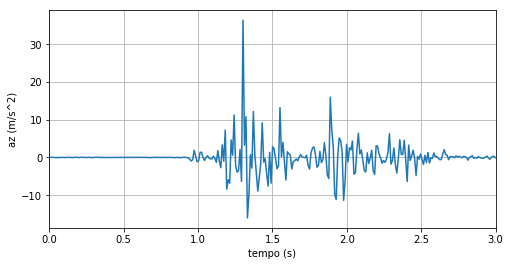

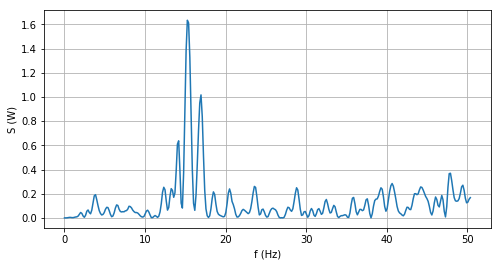

In [42]:
# Cálculo periodograma no input

az = MRPy(data[2], data.fs)  
t  = az.t_axis()

plt.figure(7, figsize=(8, 4), clear=True)
plt.plot(t, az[0])

plt.xlim(0,3);  plt.xlabel('tempo (s)') 
plt.ylabel('az (m/s^2)') 

plt.grid(True) 

S, fs = az.periodogram()
f = az.f_axis()

plt.figure(figsize=(8, 4))
plt.plot(f, S[0])
plt.xlabel('f (Hz)') 
plt.ylabel('S (W)') 

plt.grid(True)

#### Periodograma de saída (Output) 

Para o cálculo da resposta estrutural às excitações, foi necessário estabelecer uma frequência de dominância, a qual será fixada e representada no gráfico. Observando a resposta anterior, podemos perceber que a frequência de maiores vibrações, ou seja, aquela que é denominada de frequência natural do sistema pela predominância de movimento observada em relação a um tempo. Agora é calculada a resposta, com a utilização da Integral de Duhamel, em relação à frequência de 15Hz (_fn_), e logo abaixo seu periodograma.

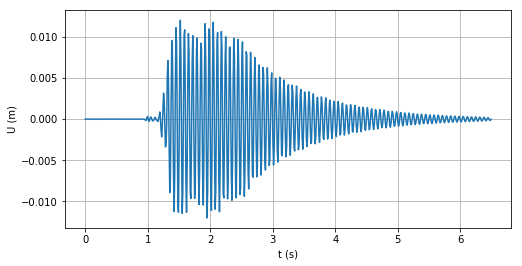

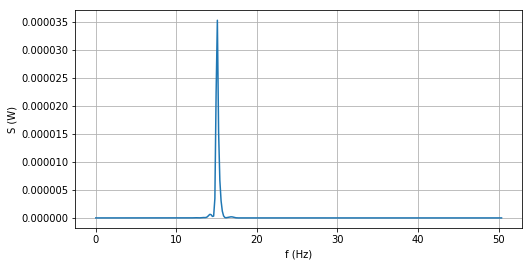

In [43]:
# Cálculo periodograma no output

fnout = 15
uout = az.sdof_Duhamel(fnout, zt, u0, v0)/m

plt.figure(figsize=(8, 4))
plt.plot(t, uout[0])
plt.xlabel('t (s)') 
plt.ylabel('U (m)')

plt.grid(True)

Sout, fsout = uout.periodogram()
fout = uout.f_axis()

plt.figure(figsize=(8, 4))
plt.plot(fout, Sout[0])
plt.xlabel('f (Hz)') 
plt.ylabel('S (W)') 

plt.grid(True)

## 6. Resultados

Um espectro de resposta constitui a assinatura espectral de um sistema, ou seja, caracteriza um sistema como único em termos de respostas às vibrações sofridas. Finalmente, é reduzido a um conjunto de respostas de pico para fins de dimensionamento estrutural. O resultado encontrado do valor máximo de pseudo aceleração foi aproximadamente $100,17$ $m/s^2$, explicitado abaixo no código:

In [44]:
print(a2.max())

100.17264471747481
